In [1]:
# Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,ShuffleSplit
from sklearn import svm
import sys
# sys.path.append('/home/ralfahad/PythonUtility/PTE')
# from PhaseTE_MF import PhaseTE_MF
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import warnings
from sklearn import svm, metrics,preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc,classification_report
from matplotlib import pyplot as plt
from collections import Counter
from scipy.stats import norm
# from sklearn import metrics
# import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#Load the metadata
# path='/home/sultan/EEG/Source_Level_Analysis/25sam_10ms_clear_all_erp.csv'
# path="/home/sultan/EEG/Source_Level_Analysis/50tr10ms_all_clear_erp.csv"
# path="/home/sultan/EEG/Source_Level_Analysis/75sam_10ms_clear_all_erp.csv"
# path="/home/sultan/EEG/Source_Level_Analysis/Baseline_100sam_10ms_clear_all_erp.csv"
path="/home/sultan/EEG/Source_Level_Analysis/100sam_10ms_noise_all_erp.csv"
# path="/home/sultan/EEG/Source_Level_Analysis/125sam_10ms_clear_all_erp.csv"
Metadata=pd.read_csv(path)
Metadata.head(2)

,Unnamed: 0,label,0,1,2,3,4,5,6,7,...,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427
0,0,0.0,4.270001e-10,1.756739e-10,-1.582226e-10,-1.382528e-10,-1.566167e-10,-1.135809e-10,-1.100892e-10,-1.589276e-10,...,1.110038e-10,1.152507e-10,-2.399226e-10,3.433448e-10,2.240594e-10,3.181698e-10,-1.644904e-10,1.001664e-10,-5.799119e-11,-4.880700e-10
1,1,0.0,5.456352e-10,2.865467e-10,-2.532695e-10,-2.100140e-10,-2.099953e-10,-5.603980e-12,-2.883015e-10,1.572863e-11,...,8.383168e-11,2.517060e-10,-8.620627e-11,2.037169e-10,2.261165e-10,3.166203e-10,-7.354289e-11,-5.902324e-11,-4.279494e-11,-3.508126e-10


In [3]:
# random state; 
rs=41;

In [4]:
X=Metadata.iloc[:,2:]
y=Metadata['label']
X.shape,y.shape

((1804, 1428), (1804,))

# Apply SVM on Data

In [5]:
gamma_range = np.logspace(-2, 2, 5)
gamma_range

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [6]:
from sklearn import preprocessing
# X=preprocessing.scale(X)
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
print X.shape,y.shape
from sklearn.preprocessing import label_binarize
y=label_binarize(np.asarray(y),[0,1])

#C_range = np.logspace(-2, 10, 13)
# gamma_range = np.logspace(-2, 2, 5)
gamma_range = [0.01,0.002,0.00069,0.0007,0.0005]
C_range = np.logspace(-2, 2, 5)
#gamma_range = np.logspace(-2, 2, 5)

print C_range,gamma_range


(1804, 1428) (1804,)
[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02] [0.01, 0.002, 0.00069, 0.0007, 0.0005]


## here I disable the l-15 clf_tune.....

In [7]:
#Classifiaction:
# #Splitting
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=rs)
cv = ShuffleSplit(X_train.shape[0], test_size=0.20, random_state=rs)

# Define Classifier
svr = svm.SVC(kernel='rbf')

# Deffine tuning parameter
C_range = np.logspace(-2, 2, 5)
# gamma_range = np.logspace(-2, 2, 5)
gamma_range = [0.01,0.002,0.00069,0.0007,0.0005]
param_grid = dict(gamma=gamma_range, C=C_range)
# clf_Tune = GridSearchCV(estimator=svr, cv=5, param_grid=param_grid,n_jobs=-1, verbose=True)
# clf_Tune.fit(X_train,y_train)
# print 'Finish tuning'      

In [8]:
# y_p=clf_Tune.best_estimator_.predict(X_test)
# print "Accuracy:", clf_Tune.score(X_test, y_test)  
# # print pred
# # print y_test
# print "support:", len(clf_Tune.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

In [9]:
# # print 'Validation accuracy={}, best {}' .format(clf_Tune.best_score_,clf_Tune.best_params_)
# clf_Tune.best_params_
# # clf_Tune.best_estimator_

## uptothis

In [10]:
# # Utility function to move the midpoint of a colormap to be around
# # the values of interest.
# from matplotlib.colors import Normalize
# class MidpointNormalize(Normalize):

#     def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
#         self.midpoint = midpoint
#         Normalize.__init__(self, vmin, vmax, clip)

#     def __call__(self, value, clip=None):
#         x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
#         return np.ma.masked_array(np.interp(value, x, y))
    
# scores = clf_Tune.cv_results_['mean_test_score'].reshape(len(C_range),len(gamma_range))
# #print scores.shape,len(C_range),len(gamma_range)
# plt.figure(figsize=(8, 6))
# #plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
# plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot, norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
# plt.xlabel('gamma')
# plt.ylabel('C')
# plt.colorbar()
# plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
# plt.yticks(np.arange(len(C_range)), C_range)
# plt.title('Validation accuracy={}, best {}' .format(clf_Tune.best_score_,clf_Tune.best_params_))

# #filename='ParameterTuning'
# #save_format='png'
# #print filename+'.'+save_format
# #pp='home/ralfahad/Pictures'
# #plt.savefig(filename+'.'+save_format,dpi=100)
# #plt.show()

# Find Significant correlation with stability selections 

### Make the dataset

In [11]:
# Pre Processing 
X[0,:10]

array([ 0.67814456,  0.15669646, -0.30946844, -0.22098055, -0.67369314,
       -0.48778411,  0.07977262, -1.51255317, -0.17331251, -0.14478503])

In [12]:
from sklearn import preprocessing
X=preprocessing.scale(X)
# scaler = preprocessing.StandardScaler()
# X = scaler.fit_transform(X)
print X.shape,y.shape
from sklearn.preprocessing import label_binarize
y=label_binarize(np.asarray(y),[0,1])

(1804, 1428) (1804, 1)


In [13]:
# np.var(X[:,1])

### Randomized Logistic Regression 

In [14]:
from sklearn.linear_model import (RandomizedLasso, lasso_stability_path,LassoLarsCV)
from sklearn.exceptions import ConvergenceWarning

#Model Library
from sklearn.linear_model import (RandomizedLasso, lasso_stability_path, LassoLarsCV)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, RandomizedLogisticRegression
from sklearn import svm

# Performance analysis library 
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut, cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# preprocessing
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split # test train split
from sklearn.model_selection import ShuffleSplit

In [15]:
with warnings.catch_warnings():
    #warnings.simplefilter('ignore', UserWarning)
    warnings.simplefilter('ignore', ConvergenceWarning)
    lars_cv = LassoLarsCV(cv=5).fit(X, y)
# print lars_cv.alpha_
lars_cv.alphas_

array([0.00284981])

In [16]:
# Run the RandomizedLasso: we use a paths going down to .1*alpha_max
# to avoid exploring the regime in which very noisy variables enter
# the model
alphas = np.linspace(lars_cv.alphas_[0], .1 * lars_cv.alphas_[0], 10)
print alphas
clf = RandomizedLasso(alpha=alphas,random_state=rs,max_iter=1000).fit(X, y)

[0.00284981 0.00256483 0.00227985 0.00199487 0.00170988 0.0014249
 0.00113992 0.00085494 0.00056996 0.00028498]


In [17]:
clf.scores_

array([0.01 , 0.015, 0.005, ..., 0.   , 0.   , 0.005])

In [18]:
# # Rank the Features according to the importance
# names=range(0,1428) # Feature names used as 1-1428 features
# cn=np.asarray(names) # converted as numpy.ndarray
# # print "Features sorted by their score:"
# b= sorted(zip(map(lambda x: round(x, 4), clf.scores_), cn), reverse=True)
# bb=np.asarray(b)
# rakfe=bb[bb[:,0]>0.34]
# ROIs=rakfe[:,1]%68

In [19]:
# # print "Features sorted by their score:"
# b= sorted(zip(map(lambda x: round(x, 4), clf.scores_), 
#                  cn), reverse=True)

In [20]:
# bb=np.asarray(b)
# # rf=np.where(bb[:,0]>0.7)
# # ifea=np.squeeze(np.asarray(np.where(clf.scores_>=0.815)))
# ra=bb[bb[:,0]>0.50]
# # r=bb[e]
# ra[:,1]%68

In [21]:
# ind=np.where(clf.scores_>=0.710)
# ind

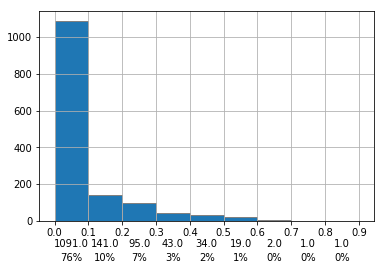

In [22]:
from matplotlib.ticker import FormatStrFormatter
data=clf.scores_
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(data,bins=np.round(0.1*np.arange(0,10),2) ,edgecolor='gray')

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)

# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))


# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    ax.annotate(str(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')


# Give ourselves some more room at the bottom of the plot
plt.subplots_adjust(bottom=0.15)
plt.grid(True)
plt.show()

### Find the optimal threshold

In [23]:
bins

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [24]:
Th_2_Bins_Index= np.where((bins<=1.0) & (bins>=0.0)) # take the bins within a range
# print Th_2_Bins_Index
print bins
Th_2_Bins=bins[Th_2_Bins_Index]
print Th_2_Bins

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [25]:
from sklearn import preprocessing
X=preprocessing.scale(X)
print X.shape,y.shape
from sklearn.preprocessing import label_binarize
y=label_binarize(np.asarray(y),[0,1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
print X_train.shape, X_test.shape, y_train.shape, y_test.shape

(1804, 1428) (1804, 1)
(1443, 1428) (361, 1428) (1443, 1) (361, 1)


In [26]:
X_train[:,1:10]

array([[ 8.23213910e-01,  1.26715236e-02, -3.65936042e-01, ...,
        -2.80510675e-01,  1.14392982e+00,  1.80611946e+00],
       [-1.45721911e-01,  7.36850512e-01,  8.97403293e-01, ...,
         7.94821545e-01, -1.63478677e-01, -3.72073517e-01],
       [ 6.78061471e-01, -2.27435382e-01,  2.82988769e-01, ...,
        -2.39826025e-01,  5.95707881e-01,  5.66261676e-01],
       ...,
       [ 9.83434791e-01, -8.57634933e-01, -1.12321639e+00, ...,
        -7.14318595e-01,  2.33717597e-04,  3.90033603e-01],
       [ 4.21225340e-01, -9.19424743e-01, -5.80947891e-01, ...,
         1.47397581e-01,  2.11833144e-01, -3.13629121e-01],
       [-1.60388947e-01,  4.95472992e-01,  2.14551177e-01, ...,
        -1.25688307e+00,  7.79772326e-01,  2.86150456e-01]])

In [27]:
type(X_train)#[:,np.squeeze(np.asarray(np.where(clf.scores_>=0.16)))].shape#,y_train

numpy.ndarray

In [28]:
# C_range = np.logspace(-2, 2, 5)
C_range = [1,2,4,6,8,10,12,15,16,20,30,40,100]
gamma_range = [0.01,0.002,0.00069,0.0007,0.0005]
# gamma_range = np.logspace(-2, 2, 5)
param_grid = dict(gamma=gamma_range, C=C_range)
#clf_Tune = GridSearchCV(estimator=svr, cv=1, param_grid=param_grid,n_jobs=-1)
clf_Tune = GridSearchCV(estimator=svr, cv=5, param_grid=param_grid,n_jobs=-1, verbose=True)
clf_Tune.fit(X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=Th_2_Bins[0])))],y_train)

Fitting 5 folds for each of 65 candidates, totalling 325 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 325 out of 325 | elapsed: 19.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [1, 2, 4, 6, 8, 10, 12, 15, 16, 20, 30, 40, 100], 'gamma': [0.01, 0.002, 0.00069, 0.0007, 0.0005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [29]:
# use tuned parameter on to get model
y_p = clf_Tune.best_estimator_.predict(X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=Th_2_Bins[0])))])

print accuracy_score(y_test, y_p)

0.8642659279778393


In [30]:
# #Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
#cv = ShuffleSplit(X_train.shape[0], test_size=0.2, random_state=rs)

# Define Classifier
svr = svm.SVC(kernel='rbf')

# Deffine tuning parameter
# C_range = np.logspace(-2, 10, 13)
# gamma_range = np.logspace(-9, 3, 13)

C_range = np.logspace(-2, 2, 5)
gamma_range = [1,0.5, 0.25,0.01,0.002]
# gamma_range = [0.01,0.002,0.0006,0.0007]
# gamma_range = [0.1,0.01,0.002,0.0005,0.0006,0.0007,]
# C_range = [20, 30,50]
# C_range=[1000,1500]
# C_range = [1,2,4,6,8,10,12,15,16,20,30,40,100]
# gamma_range = [0.01,0.015, 0.018, 0.002,0.003,0.0004, 0.0005,0.0006,0.0007]; # 0.0007=1/1428 1428 = no. of features
# gamma_range = np.logspace(-2, 2, 5)
param_grid = dict(gamma=gamma_range, C=C_range)
#clf_Tune = GridSearchCV(estimator=svr, cv=1, param_grid=param_grid,n_jobs=-1)
clf_Tune = GridSearchCV(estimator=svr, cv=5, param_grid=param_grid,n_jobs=-1, verbose=True)
##  Define LeaveOneOutCrossValidation
#loocv = LeaveOneOut()
ACC_Th2=[]
AUC_Th2=[]
SV=[]
Bins=[]
Fsc=[]
for i in Th_2_Bins:
    print i
    try:
        print X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape
        
        #Hyper parameter Tuning 
        clf_Tune.fit(X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))],y_train)
        print X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape ,y_train.shape
        print 'Finish tuning'
        print clf_Tune.best_estimator_

        # use tuned parameter on to get model
        y_p = clf_Tune.best_estimator_.predict(X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))])

        ACC_Th2_T=accuracy_score(y_test, y_p)
        fpr, tpr, thresholds = metrics.roc_curve(y_test,y_p)
        AUC_Th2_T=metrics.auc(fpr, tpr)
        perf=classification_report(y_test, y_p)
        print 'Shape', X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape
        print 'ACC',ACC_Th2_T,AUC_Th2_T
        SVe=float(len(clf_Tune.best_estimator_.support_vectors_))/X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape[0]
        print SVe
        SV.append(SVe)
#         print 'Report',classification_report(y_test, y_p)
        ACC_Th2.append(ACC_Th2_T)
        AUC_Th2.append(AUC_Th2_T)
        Fsc.append(perf)
        Bins.append(i)
    except:
        print 'error at:',i
    # false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_p)
    # roc_auc_T = auc(false_positive_rate, true_positive_rate)
    # print 'AUC',roc_auc_T
    # AUC_Th2.append(roc_auc_T)

0.0
(1443, 1428)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  8.2min finished


(1443, 1428) (1443, 1)
Finish tuning
SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.002, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (361, 1428)
ACC 0.8254847645429363 0.7684059439378588
0.926541926542
0.1
(1443, 337)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  1.5min finished


(1443, 337) (1443, 1)
Finish tuning
SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.002, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (361, 337)
ACC 0.8587257617728532 0.8454745018574806
0.578655578656
0.2
(1443, 196)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   56.8s finished


(1443, 196) (1443, 1)
Finish tuning
SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.002, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (361, 196)
ACC 0.8476454293628809 0.84064505234718
0.519057519058
0.3
(1443, 101)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   35.1s finished


(1443, 101) (1443, 1)
Finish tuning
SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (361, 101)
ACC 0.8476454293628809 0.8351232691658225
0.608454608455
0.4
(1443, 58)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   23.6s finished


(1443, 58) (1443, 1)
Finish tuning
SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.002, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (361, 58)
ACC 0.8254847645429363 0.827304964539007
0.480249480249
0.5
(1443, 24)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   14.8s finished


(1443, 24) (1443, 1)
Finish tuning
SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (361, 24)
ACC 0.7867036011080333 0.7901553529213104
0.538461538462
0.6
(1443, 5)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   10.7s finished


(1443, 5) (1443, 1)
Finish tuning
SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.25, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (361, 5)
ACC 0.6786703601108033 0.6280310705842621
0.820512820513
0.7
(1443, 3)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    9.8s finished


(1443, 3) (1443, 1)
Finish tuning
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (361, 3)
ACC 0.6426592797783933 0.5856467409658899
0.769230769231
0.8
(1443, 2)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    9.9s finished


(1443, 2) (1443, 1)
Finish tuning
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (361, 2)
ACC 0.6260387811634349 0.5655184059439379
0.817047817048
0.9
(1443,)
Fitting 5 folds for each of 25 candidates, totalling 125 fits
error at: 0.9


In [31]:
# accuracy_score(y_test, y_p)
# MulticlassAuc(y_test,y_p)

In [32]:
for i in range(0,9):
    print ACC_Th2[i] 
    print (Fsc[i])

0.8254847645429363
             precision    recall  f1-score   support

          0       0.88      0.58      0.70       126
          1       0.81      0.96      0.88       235

avg / total       0.83      0.83      0.81       361

0.8587257617728532
             precision    recall  f1-score   support

          0       0.80      0.80      0.80       126
          1       0.89      0.89      0.89       235

avg / total       0.86      0.86      0.86       361

0.8476454293628809
             precision    recall  f1-score   support

          0       0.76      0.82      0.79       126
          1       0.90      0.86      0.88       235

avg / total       0.85      0.85      0.85       361

0.8476454293628809
             precision    recall  f1-score   support

          0       0.78      0.79      0.78       126
          1       0.89      0.88      0.88       235

avg / total       0.85      0.85      0.85       361

0.8254847645429363
             precision    recall  f1-score   

In [33]:
        
#         ACC_Th2_T=accuracy_score(y_test, y_p)
#         AUC_Th2_T=MulticlassAuc(y_test,y_p)
#         print 'Shape', X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape
#         print 'ACC',ACC_Th2_T,AUC_Th2_T
#         ACC_Th2.append(ACC_Th2_T)
#         AUC_Th2.append(AUC_Th2_T)
#         Bins.append(i)
#     except:
#         print 'error at:',i
#     # false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_p)
#     # roc_auc_T = auc(false_positive_rate, true_positive_rate)
#     # print 'AUC',roc_auc_T
#     # AUC_Th2.append(roc_auc_T)

In [34]:
ACC_Th2 

[0.8254847645429363,
 0.8587257617728532,
 0.8476454293628809,
 0.8476454293628809,
 0.8254847645429363,
 0.7867036011080333,
 0.6786703601108033,
 0.6426592797783933,
 0.6260387811634349]

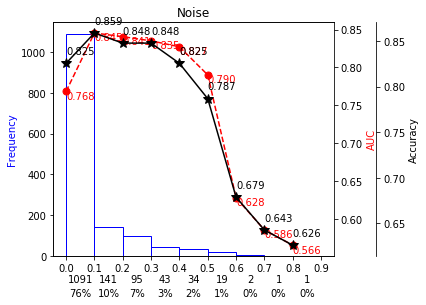

In [35]:
from matplotlib.ticker import FormatStrFormatter
Th_2_Bins=np.asarray(Bins)
data=clf.scores_
fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)
#counts, bins, patches = ax.hist(data,10 ,edgecolor='gray')
counts, bins, patches = ax.hist(data,bins=np.round(0.1*np.arange(0,10),2),facecolor="None",edgecolor='blue', lw=1)
# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)
# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))


bin_centers = 0.5 * np.diff(bins) + bins[:-1]

#show % value
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    ax.annotate(int(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')
    
    # Give ourselves some more room at the bottom of the plot

ax2 = ax.twinx()
ax2.plot(Th_2_Bins,AUC_Th2, color='red',ls='dashed' )#,THbin,CCC_Per)
ax2.set_frame_on(False)
ax2.set_ylabel('AUC', color='red')
ax2.patch.set_visible(False)
for i,j in zip(Th_2_Bins,AUC_Th2):
    #ax2.annotate(("%.2f" % j),xy=(i+0.04,j-0.01), color ='red') ##############################
    ax2.annotate(("%.3f" % j),xy=(i,j-0.01), color ='red') ##############################
    ax2.plot(i,j, marker='o', markersize=7, color="red")


    
ax3 = ax.twinx()
ax3.plot(Th_2_Bins,ACC_Th2, color='black')#,THbin,CCC_Per)
ax3.set_frame_on(False)
ax3.set_ylabel('Accuracy', color='black')






for i,j in zip(Th_2_Bins,ACC_Th2):
     #ax3.annotate(("%0.2f" % j),xy=(i-0.05,j), color='black')
    #ax3.annotate(("%0.2f" % j),xy=(i-0.1,j), color='black')##################################
    ax3.annotate(("%0.3f" % j),xy=(i,j+0.01), color='black')##################################
    ax3.plot(i,j, marker='*', markersize=10, color="black")
    #ax3.annotate(("%0.2f,%0.2f" % (i,j)),xy=(i-0.05,j), color='green')
    #ax3.annotate(("%0.3f" %j),xy=(i,j), color='green')


    
    
    
    
# Move the last y-axis spine over to the right by 20% of the width of the axes
ax3.spines['right'].set_position(('axes', 1.15))
ax3.spines['right'].set_visible(True)

# To make the border of the right-most axis visible, we need to turn the frame
# on. This hides the other plots, however, so we need to turn its fill off.
ax3.set_frame_on(True)
ax3.patch.set_visible(False)


#ax.plot(bins,np.linspace(0,1,11))
plt.subplots_adjust(bottom=0.15)
plt.grid(False,which='both')
ax.set_ylabel('Frequency')
ax.yaxis.label.set_color('Blue')
plt.title("Noise")
plt.tight_layout()
# #Save the image into a folder

filename='StabilitySelection_clear'
save_format='png'
#print filename+'.'+save_format
#pp='home/ralfahad/Pictures'
#plt.savefig(filename+'.'+save_format,dpi=100)
# plt.savefig(filename+'.'+save_format,dpi=300, bbox_inches='tight')
plt.show()



# ROIs added

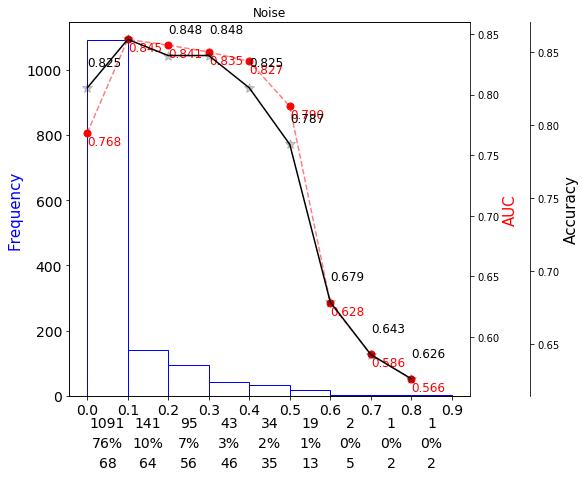

In [36]:
# roisc=[68,68,61,45,22,8,3,0,2]
roisc=[68,64,56,46,35,13,5,2,2]
from matplotlib.ticker import FormatStrFormatter
Th_2_Bins=np.asarray(Bins)
data=clf.scores_
fig, ax = plt.subplots(figsize=(8,6))
fig.subplots_adjust(right=0.75)
#counts, bins, patches = ax.hist(data,10 ,edgecolor='gray')
counts, bins, patches = ax.hist(data,bins=np.round(0.1*np.arange(0,10),2),facecolor="None",edgecolor='blue', lw=1)
# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)
# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(14) 

bin_centers = 0.5 * np.diff(bins) + bins[:-1]

#show % value
for count, x,rois in zip(counts, bin_centers,roisc):
    # Label the raw counts
    ax.annotate(int(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -20), fontsize=14,textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -40), fontsize=14,textcoords='offset points', va='top', ha='center')
    # ROIs
    ax.annotate(rois, xy=(x, 0), xycoords=('data', 'axes fraction'),
    xytext=(0, -60),fontsize=14, textcoords='offset points', va='top', ha='center')
    
    # Give ourselves some more room at the bottom of the plot

ax2 = ax.twinx()
ax2.plot(Th_2_Bins,AUC_Th2, color='red',ls='dashed',alpha=0.5)#,THbin,CCC_Per)
ax2.set_frame_on(False)
ax2.set_ylabel('AUC', color='red',fontsize=15)
ax2.patch.set_visible(False)
for i,j in zip(Th_2_Bins,AUC_Th2):
    #ax2.annotate(("%.2f" % j),xy=(i+0.04,j-0.01), color ='red') ##############################
    ax2.annotate(("%.3f" % j),xy=(i,j-0.01), color ='red',fontsize=12) ##############################
    ax2.plot(i,j, marker='o', markersize=7, color="red")


    
ax3 = ax.twinx()
ax3.plot(Th_2_Bins,ACC_Th2, color='black')#,THbin,CCC_Per)
ax3.set_frame_on(False)
ax3.set_ylabel('Accuracy', color='black',fontsize=15)






for i,j in zip(Th_2_Bins,ACC_Th2):
     #ax3.annotate(("%0.2f" % j),xy=(i-0.05,j), color='black')
    #ax3.annotate(("%0.2f" % j),xy=(i-0.1,j), color='black')##################################
    ax3.annotate(("%0.3f" % j),xy=(i,j+0.015), color='black',fontsize=12)##################################
    ax3.plot(i,j, marker='*', markersize=10, color="black",alpha=0.2)
    #ax3.annotate(("%0.2f,%0.2f" % (i,j)),xy=(i-0.05,j), color='green')
    #ax3.annotate(("%0.3f" %j),xy=(i,j), color='green')
    
    
# Move the last y-axis spine over to the right by 20% of the width of the axes
ax3.spines['right'].set_position(('axes', 1.15))
ax3.spines['right'].set_visible(True)

# To make the border of the right-most axis visible, we need to turn the frame
# on. This hides the other plots, however, so we need to turn its fill off.
ax3.set_frame_on(True)
ax3.patch.set_visible(False)


#ax.plot(bins,np.linspace(0,1,11))
plt.subplots_adjust(bottom=.15)
plt.grid(False,which='both')
ax.set_ylabel('Frequency',fontsize=15)
ax.yaxis.label.set_color('Blue')
plt.title("Noise")
plt.tight_layout()
# #Save the image
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(14)
filename='StabilitySelection_clear'
save_format='png'
#print filename+'.'+save_format
#pp='home/ralfahad/Pictures'
#plt.savefig(filename+'.'+save_format,dpi=100)
plt.savefig(filename+'.'+save_format,dpi=300, bbox_inches='tight')
plt.show()



# Make it inside boundary

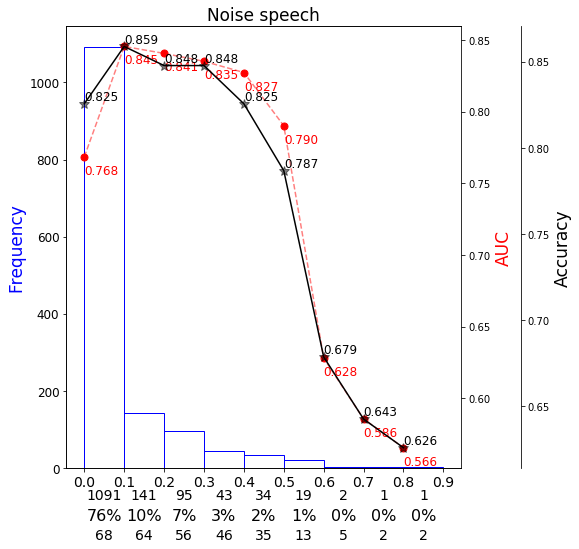

In [116]:
# roisc=[68,68,61,45,22,8,3,0,2]
roisc=[68,64,56,46,35,13,5,2,2]
from matplotlib.ticker import FormatStrFormatter
Th_2_Bins=np.asarray(Bins)
data=clf.scores_
fig, ax = plt.subplots(figsize=(8,7))
fig.subplots_adjust(right=0.75)
#counts, bins, patches = ax.hist(data,10 ,edgecolor='gray')
counts, bins, patches = ax.hist(data,bins=np.round(0.1*np.arange(0,10),2),facecolor="None",edgecolor='blue', lw=1)
# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)
# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(14) 

bin_centers = 0.5 * np.diff(bins) + bins[:-1]

#show % value
for count, x,rois in zip(counts, bin_centers,roisc):
    # Label the raw counts
    ax.annotate(int(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -20), fontsize=14,textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -40), fontsize=14,textcoords='offset points', va='top', ha='center')
    # ROIs
    ax.annotate(rois, xy=(x, 0), xycoords=('data', 'axes fraction'),
    xytext=(0, -60),fontsize=14, textcoords='offset points', va='top', ha='center')
    
    # Give ourselves some more room at the bottom of the plot

ax2 = ax.twinx()
ax2.plot(Th_2_Bins,AUC_Th2, color='red',ls='dashed',alpha=0.5)#,THbin,CCC_Per)
ax2.set_frame_on(False)
ax2.set_ylabel('AUC', color='red',fontsize=17)
ax2.patch.set_visible(False)
for i,j in zip(Th_2_Bins,AUC_Th2):
    #ax2.annotate(("%.2f" % j),xy=(i+0.04,j-0.01), color ='red') ##############################
    ax2.annotate(("%.3f" % j),xy=(i,j-0.012), color ='red',fontsize=12) ##############################
    ax2.plot(i,j, marker='o', markersize=7, color="red")


    
ax3 = ax.twinx()
ax3.plot(Th_2_Bins,ACC_Th2, color='black')#,THbin,CCC_Per)
ax3.set_frame_on(False)
ax3.set_ylabel('Accuracy', color='black',fontsize=17)



for i,j in zip(Th_2_Bins,ACC_Th2):
     #ax3.annotate(("%0.2f" % j),xy=(i-0.05,j), color='black')
    #ax3.annotate(("%0.2f" % j),xy=(i-0.1,j), color='black')##################################
    ax3.annotate(("%0.3f" % j),xy=(i,j+0.002), color='black',fontsize=12)##################################
    ax3.plot(i,j, marker='*', markersize=10, color="black",alpha=0.5)
    #ax3.annotate(("%0.2f,%0.2f" % (i,j)),xy=(i-0.05,j), color='green')
    #ax3.annotate(("%0.3f" %j),xy=(i,j), color='green')
    
    
# Move the last y-axis spine over to the right by 20% of the width of the axes
ax3.spines['right'].set_position(('axes', 1.15))
ax3.spines['right'].set_visible(True)

# To make the border of the right-most axis visible, we need to turn the frame
# on. This hides the other plots, however, so we need to turn its fill off.
ax3.set_frame_on(True)
ax3.patch.set_visible(False)

#ax.plot(bins,np.linspace(0,1,11))
plt.subplots_adjust(bottom=.15)
plt.grid(False,which='both')
ax.set_ylabel('Frequency',fontsize=17)
ax.yaxis.label.set_color('Blue')
plt.title("Noise speech", fontsize=17)
plt.tight_layout()
# #Save the image
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(12)
filename='StabilitySelection_clear'
save_format='png'
#print filename+'.'+save_format
#pp='home/ralfahad/Pictures'
#plt.savefig(filename+'.'+save_format,dpi=100)
# plt.savefig(filename+'.'+save_format,dpi=300, bbox_inches='tight')
plt.show()



In [38]:
# for i,j in zip(Th_2_Bins,AUC_Th2):
#     print i,j
All_ACC=[]
All_AUC=[]
ALL_Bins=[]
All_SV=[]
NumberofElement=[]
for i,j,k,l in zip(Th_2_Bins,ACC_Th2,AUC_Th2, SV):
    Th2Index=np.squeeze(np.asarray(np.where(clf.scores_>=i)))
#     print ("{0:.2f}".format(i)),("{0:.2f}".format(j)),("{0:.2f}".format(k)),len(Th2Index),("{0:.2f}".format(l))
#     NumberofElement.append(len(Th2Index))
    print ("{0:.2f}".format(i)),("{0:.2f}".format(j)),("{0:.2f}".format(k)),len(Th2Index)
    NumberofElement.append(len(Th2Index))
    ALL_Bins.append("{0:.2f}".format(i))
    All_ACC.append("{0:.2f}".format(j))
    All_AUC.append("{0:.2f}".format(k))
    All_SV.append("{0:.2f}".format(l))

# Selected_Feature_Result=pd.concat([pd.DataFrame(ALL_Bins),pd.DataFrame(All_ACC),
#            pd.DataFrame(All_AUC),pd.DataFrame(NumberofElement),pd.DataFrame(All_SV)],axis=1)
# Selected_Feature_Result.columns=['Threshold','ACC','AUC','NoEle','SV']
Selected_Feature_Result=pd.concat([pd.DataFrame(ALL_Bins),pd.DataFrame(All_ACC),
           pd.DataFrame(All_AUC),pd.DataFrame(NumberofElement)],axis=1)
Selected_Feature_Result.columns=['Threshold','ACC','AUC','NoEle']
Selected_Feature_Result

0.00 0.83 0.77 1428
0.10 0.86 0.85 337
0.20 0.85 0.84 196
0.30 0.85 0.84 101
0.40 0.83 0.83 58
0.50 0.79 0.79 24
0.60 0.68 0.63 5
0.70 0.64 0.59 3
0.80 0.63 0.57 2


,Threshold,ACC,AUC,NoEle
0,0.00,0.83,0.77,1428
1,0.10,0.86,0.85,337
2,0.20,0.85,0.84,196
3,0.30,0.85,0.84,101
4,0.40,0.83,0.83,58
5,0.50,0.79,0.79,24
6,0.60,0.68,0.63,5
7,0.70,0.64,0.59,3
8,0.80,0.63,0.57,2


In [39]:
Th_2_Bins[4]

0.4

In [40]:
# Need to chage gamma range . It is selecting too many features
# Let 0.34 is our best Thr. TO get the index numer with this thr
fealoc=np.squeeze(np.asarray(np.where(clf.scores_>=Th_2_Bins[4])))
fealoc
# len(fealoc)
# Do you get it? yes > How about number of support of the model?

array([  59,   85,  131,  149,  157,  167,  178,  215,  217,  229,  230,
        238,  258,  262,  269,  272,  279,  287,  331,  340,  413,  423,
        426,  466,  468,  472,  476,  477,  495,  513,  558,  565,  633,
        645,  679,  782,  833,  877,  904,  935,  938,  972, 1010, 1021,
       1053, 1092, 1105, 1156, 1157, 1170, 1177, 1229, 1273, 1331, 1374,
       1402, 1418, 1423])

In [41]:
ROI=fealoc%68
ROI
np.unique(ROI,return_counts=True)

(array([ 0,  1,  4,  5,  7, 11, 13, 14, 15, 17, 18, 19, 20, 21, 25, 26, 31,
        33, 34, 37, 39, 42, 49, 51, 54, 58, 59, 60, 61, 63, 64, 65, 67]),
 array([4, 3, 1, 2, 1, 1, 2, 3, 2, 3, 1, 1, 2, 4, 1, 1, 1, 2, 2, 1, 1, 2,
        1, 1, 2, 4, 2, 1, 1, 2, 1, 1, 1]))

In [42]:
len(np.unique(ROI))
# np.unique(ROI,return_counts=True)

33

In [43]:
for th in Th_2_Bins:
    clf_Tune.fit(X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=th)))],y_train)
    print X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=th)))].shape ,y_train.shape
    print 'Finish tuning'
    print float(len(clf_Tune.best_estimator_.support_vectors_))/X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=th)))].shape[0]*100
# use tuned parameter on to get model
#y_p = clf_Tune.best_estimator_.predict(X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))])

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  8.0min finished


(1443, 1428) (1443, 1)
Finish tuning
92.6541926542
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  1.5min finished


(1443, 337) (1443, 1)
Finish tuning
57.8655578656
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   57.7s finished


(1443, 196) (1443, 1)
Finish tuning
51.9057519058
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   34.6s finished


(1443, 101) (1443, 1)
Finish tuning
60.8454608455
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   23.6s finished


(1443, 58) (1443, 1)
Finish tuning
48.0249480249
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   14.6s finished


(1443, 24) (1443, 1)
Finish tuning
53.8461538462
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   11.2s finished


(1443, 5) (1443, 1)
Finish tuning
82.0512820513
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 118 out of 125 | elapsed:    9.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    9.9s finished


(1443, 3) (1443, 1)
Finish tuning
76.9230769231
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    9.4s finished


(1443, 2) (1443, 1)
Finish tuning
81.7047817048


In [44]:
# float(len(clf_Tune.best_estimator_.support_vectors_))/X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=0.25)))].shape[0]*100

In [45]:
# result it overfitting need to be less or equal to 40%

# Rank the Feature Vectors as their importance

## *Here we need to change in "rakfe=bb[bb[:,0]>=Th_2_Bins[5]];"5 means 0.5*

In [78]:
# Rank the Features according to the importance
names=range(0,1428) # Feature names used as 1-1428 features
cn=np.asarray(names) # converted as numpy.ndarray
# print "Features sorted by their score:"
b= sorted(zip(map(lambda x: round(x, 4), clf.scores_), cn), reverse=True)
# print b
bb=np.asarray(b)
rakfe=bb[bb[:,0]>=Th_2_Bins[5]]
# rakfe=bb[bb[:,0]>=.50]
ROIs=rakfe[:,1]%68
print ROIs
print len(ROIs)

[54. 13. 17.  5. 54. 14.  1. 33. 49.  0. 65. 34.  1. 21. 61.  0.  0. 42.
 21. 42. 58. 21. 58. 15.]
24


In [79]:
# # b
# ROIstime=np.floor(rakfe[:,1]/68)
# timeloc=ROIstime*10
# plt.hist(timeloc, bins=20)

In [80]:
ROI
print np.unique(ROI,return_counts=True)
print len(np.unique(ROIs))

(array([ 0,  1,  4,  5,  7, 11, 13, 14, 15, 17, 18, 19, 20, 21, 25, 26, 31,
       33, 34, 37, 39, 42, 49, 51, 54, 58, 59, 60, 61, 63, 64, 65, 67]), array([4, 3, 1, 2, 1, 1, 2, 3, 2, 3, 1, 1, 2, 4, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 1, 2, 4, 2, 1, 1, 2, 1, 1, 1]))
16


In [81]:
ROIs

array([54., 13., 17.,  5., 54., 14.,  1., 33., 49.,  0., 65., 34.,  1.,
       21., 61.,  0.,  0., 42., 21., 42., 58., 21., 58., 15.])

In [82]:
Roiname=pd.read_csv("/home/sultan/EEG/Source_Level_Analysis/DK_atlas_Visualize_index_v1.csv")

In [83]:
nor=81
shdkroi=Roiname['Desikan_Freesurfer_v5.1'] # "Desikan_Freesurfer_v5.1"  is the label of short name columns 
sdk=shdkroi[ROIs]# ROIs is the index of label
# sdk.head(nor)

In [84]:
dkfull=Roiname['BrainMesh_ICBM152.nv']
dk=dkfull[ROIs]
print dk.head(nor)
len(dk.head(nor))

54.0    rostralmiddlefrontal L
13.0                fusiform R
17.0        inferiortemporal R
5.0      caudalmiddlefrontal R
54.0    rostralmiddlefrontal L
14.0        inferiorparietal L
1.0                 bankssts R
33.0             paracentral R
49.0              precentral R
0.0                 bankssts L
65.0            temporalpole R
34.0         parahippocampal L
1.0                 bankssts R
21.0        isthmuscingulate R
61.0        superiortemporal R
0.0                 bankssts L
0.0                 bankssts L
42.0           pericalcarine L
21.0        isthmuscingulate R
42.0           pericalcarine L
58.0        superiorparietal L
21.0        isthmuscingulate R
58.0        superiorparietal L
15.0        inferiorparietal R
Name: BrainMesh_ICBM152.nv, dtype: object


24

In [85]:
# aa=pd.DataFrame(dk.values[0:nor])
# aa.columns=['ROIs']
# ab=aa.drop_duplicates()
# Toprois=pd.DataFrame(ab.values)
# print Toprois

In [86]:
# rois1=bb[0:16,1]%68
# pd.DataFrame(bb[0:16,0],shdkroi[rois1])

In [87]:
# saa=pd.DataFrame(sdk.values[0:nor])
# saa.columns=['short ROIs']
# sab=saa.drop_duplicates()
# sToprois=pd.DataFrame(sab.values)
# # print sToprois

In [88]:
# nor1=14
# sc=pd.DataFrame(bb[0:nor1,0])
# sn=pd.concat([Toprois,sToprois,sc],axis=1)
# sn.columns=['Fullname','ROIs short name', 'Feature score'] # sn: score and roi
# # ddd=pd.DataFrame(bb[0:16,0],sToprois)
# sn

In [89]:
# sn.to_csv('Top15fea.csv')
# Th_2_Bins

In [90]:
aa=pd.DataFrame(dk.values[0:nor])
aa.columns=['ROIs']
Toprois=pd.DataFrame(aa.values)
# print Toprois

In [91]:
saa=pd.DataFrame(sdk.values[0:nor])
saa.columns=['short ROIs']
sToprois=pd.DataFrame(saa.values)
# print sToprois

In [92]:
nor1=75
sc=pd.DataFrame(bb[0:nor1,0])
sn=pd.concat([Toprois,sToprois,sc],axis=1)
sn.columns=['Fullname','ROIs short name', ' Feature score'] # sn: score and roi
# ddd=pd.DataFrame(bb[0:16,0],sToprois)
sn

,Fullname,ROIs short name,Feature score
0,rostralmiddlefrontal L,lRMF,0.930
1,fusiform R,rFUS,0.810
2,inferiortemporal R,rIT,0.700
3,caudalmiddlefrontal R,rCMF,0.640
4,rostralmiddlefrontal L,lRMF,0.625
5,inferiorparietal L,lIP,0.595
6,bankssts R,rBKS,0.595
7,paracentral R,rPARAC,0.575
8,precentral R,rPRC,0.570
9,bankssts L,lBKS,0.570


In [93]:
allrois=sn.drop_duplicates(subset=['Fullname']) # Drop the duplicate name 
alluR=pd.DataFrame(allrois.values) #alluR is the unique ROIs
alluR

,0,1,2
0,rostralmiddlefrontal L,lRMF,0.93
1,fusiform R,rFUS,0.81
2,inferiortemporal R,rIT,0.7
3,caudalmiddlefrontal R,rCMF,0.64
4,inferiorparietal L,lIP,0.595
5,bankssts R,rBKS,0.595
6,paracentral R,rPARAC,0.575
7,precentral R,rPRC,0.57
8,bankssts L,lBKS,0.57
9,temporalpole R,rTP,0.55


In [94]:
# alluR.to_csv('Top14.csv')

In [95]:
# wpath="/home/sultan/EEG/Baseline_correction/Stability_results/"
# dall=alluR
# dall.to_csv(wpath+'Baseline_noise_top_rois_0.5_stability.csv')

In [64]:
len(clf.scores_)

1428

# AllROIs_stability selection_score

In [65]:
# g=clf.scores_
# allROIs=range(0,68)
# x=[];
# for i in allROIs:
# #     print i
#     r=np.arange(i,1428,68)
#     l=np.int_(r)
# #     ll=g[r]
#     ll=g[l]
#     x.append(ll)
# hh=pd.DataFrame(x)  
# t=np.linspace(0,200,21)
# yu=hh.values
# # yu=hh.values[[0,1,2,3,4,16],:]
# plt.plot(t,yu.T)
# plt.xlim(0, 200)
# plt.ylim(0,1)
# plt.grid(True)
# plt.ylabel("Stability scores")
# plt.xlabel("Epoch time (ms)")
# plt.title("Clear_all")
# # plt.legend(leg)
# plt.show()

In [66]:
# t=np.linspace(0,200,21)
# yu=hh.values
# # yu=hh.values[[0,1,2,3,4,16],:]
# plt.plot(t,yu.T)
# plt.xlim(0, 200)
# plt.ylim(0,1)
# plt.grid(True)
# plt.ylabel("Stability scores")
# plt.xlabel("Epoch time (ms)")
# plt.show()

# Top score selected ROIs

In [67]:
# leg=['rTP','rFUS', 'rPRC','lPRC','lSP']
# x=[];
# for i in ROIs:
# #     print i
#     r=np.arange(i,1428,68)
#     l=np.int_(r)
# #     ll=g[r]
#     ll=g[l]
#     x.append(ll)
# hh=pd.DataFrame(x)  
# t=np.linspace(0,200,21)
# yu=hh.values
# # yu=hh.values[0:9,:]
# # yu=hh.values[[0,1,2,3,4],:]
# plt.plot(t,yu.T)
# plt.xlim(0, 200)
# plt.ylim(0,1)
# plt.grid(True)
# plt.ylabel("Stability scores")
# plt.xlabel("Epoch time (ms)")
# plt.title("Clear")
# # plt.legend(leg)
# plt.show()

In [68]:
# leg=['rTP','rFUS', 'rPRC','lPRC','lSP']
# x=[];
# for i in ROIs:
# #     print i
#     r=np.arange(i,1428,68)
#     l=np.int_(r)
# #     ll=g[r]
#     ll=g[l]
#     x.append(ll)
# hh=pd.DataFrame(x)  
# t=np.linspace(0,200,21)
# yu=hh.values
# # yu=hh.values[0:9,:]
# yu=hh.values[[0,1,2,3,4],:]
# plt.plot(t,yu.T)
# plt.xlim(0, 200)
# plt.ylim(0,1)
# # plt.ylim(0.5,1)
# plt.grid(True)
# plt.ylabel("Stability scores")
# plt.xlabel("Epoch time (ms)")
# plt.title("Clear")
# plt.legend(leg)
# plt.show()

In [69]:
# ROIs

In [70]:
# leg=['rTP','rFUS', 'rPRC','lPRC','lSP']
# x=[];
# for i in ROIs:
# #     print i
#     r=np.arange(i,1428,68)
#     l=np.int_(r)
# #     ll=g[r]
#     ll=g[l]
#     x.append(ll)
# hh=pd.DataFrame(x)  
# t=np.linspace(0,200,21)
# yu=hh.values
# # yu=hh.values[0:9,:]
# yu=hh.values[[0,1,2],:]
# plt.plot(t,yu.T)
# plt.xlim(0, 200)
# plt.ylim(top=1)
# # plt.ylim(0.50,1)
# plt.grid(True)
# plt.ylabel("Stability scores")
# plt.xlabel("Epoch time (ms)")
# plt.title("Clear")
# plt.legend(leg)
# plt.show()

In [71]:
# ROIs=range(0,68)
# x=[];
# for i in ROIs:
# #     print i
#     r=np.arange(i,1428,68)
#     l=np.int_(r)
# #     ll=g[r]
#     ll=g[l]
#     x.append(ll)
# hh=pd.DataFrame(x) 

In [72]:
urois=[];
names=range(0,1428) # Feature names used as 1-1428 features
cn=np.asarray(names) # converted as numpy.ndarray
# print "Features sorted by their score:"
b= sorted(zip(map(lambda x: round(x, 4), clf.scores_), cn), reverse=True)
# print b
bb=np.asarray(b)
for i in range(0,9):
    rakfe=bb[bb[:,0]>=Th_2_Bins[i]]
    # rakfe=bb[bb[:,0]>=.50]
    ROIs=rakfe[:,1]%68
#     print ROIs
    print len(ROIs)
    un= len(np.unique(ROIs));
    urois.append(un)
print urois    

1428
337
196
101
58
24
5
3
2
[68, 67, 57, 45, 33, 16, 4, 3, 2]


In [73]:
All_ACC=[]
All_AUC=[]
ALL_Bins=[]
All_SV=[]
All_UR=[];
NumberofElement=[]
for i,j,k,l,m in zip(Th_2_Bins,ACC_Th2,AUC_Th2, SV,urois):
    Th2Index=np.squeeze(np.asarray(np.where(clf.scores_>=i)))
#     print ("{0:.2f}".format(i)),("{0:.2f}".format(j)),("{0:.2f}".format(k)),len(Th2Index),("{0:.2f}".format(l))
#     NumberofElement.append(len(Th2Index))
    print ("{0:.2f}".format(i)),("{0:.2f}".format(j)),("{0:.2f}".format(k)),len(Th2Index)
    NumberofElement.append(len(Th2Index))
    ALL_Bins.append("{0:.3f}".format(i))
    All_ACC.append("{0:.3f}".format(j))
    All_AUC.append("{0:.3f}".format(k))
    All_SV.append("{0:.3f}".format(l))
    All_UR.append("{0:.3f}".format(m))

# Selected_Feature_Result=pd.concat([pd.DataFrame(ALL_Bins),pd.DataFrame(All_ACC),
#            pd.DataFrame(All_AUC),pd.DataFrame(NumberofElement),pd.DataFrame(All_SV)],axis=1)
# Selected_Feature_Result.columns=['Threshold','ACC','AUC','NoEle','SV']
Selected_Feature_Result=pd.concat([pd.DataFrame(ALL_Bins),pd.DataFrame(All_ACC),
           pd.DataFrame(All_AUC),pd.DataFrame(NumberofElement),pd.DataFrame(All_UR)],axis=1)
Selected_Feature_Result.columns=['Threshold','ACC','AUC','NoEle','UR']
Selected_Feature_Result

0.00 0.83 0.77 1428
0.10 0.86 0.85 337
0.20 0.85 0.84 196
0.30 0.85 0.84 101
0.40 0.83 0.83 58
0.50 0.79 0.79 24
0.60 0.68 0.63 5
0.70 0.64 0.59 3
0.80 0.63 0.57 2


,Threshold,ACC,AUC,NoEle,UR
0,0.000,0.825,0.768,1428,68.000
1,0.100,0.859,0.845,337,67.000
2,0.200,0.848,0.841,196,57.000
3,0.300,0.848,0.835,101,45.000
4,0.400,0.825,0.827,58,33.000
5,0.500,0.787,0.790,24,16.000
6,0.600,0.679,0.628,5,4.000
7,0.700,0.643,0.586,3,3.000
8,0.800,0.626,0.566,2,2.000


In [74]:
# wpath="/home/sultan/EEG/Baseline_correction/Stability_results/"
# dall=alluR
# dall.to_csv(wpath+'Clear_top_rois_0.4_stability.csv')

In [75]:
rs

41

In [76]:
allrois=sn.drop_duplicates(subset=['Fullname']) # Drop the duplicate name 
alluR=pd.DataFrame(allrois.values) #alluR is the unique ROIs
alluR

,0,1,2
0,rostralmiddlefrontal L,lRMF,0.93
1,fusiform R,rFUS,0.81
2,inferiortemporal R,rIT,0.7
3,caudalmiddlefrontal R,rCMF,0.64
4,inferiorparietal L,lIP,0.595
5,bankssts R,rBKS,0.595
6,paracentral R,rPARAC,0.575
7,precentral R,rPRC,0.57
8,bankssts L,lBKS,0.57
9,temporalpole R,rTP,0.55


In [77]:
rs

41

In [ ]:
## Figure inside the boundary with actual ROIS

In [120]:
ur=[int(float(i)) for i in All_UR]
ur

[68, 67, 57, 45, 33, 16, 4, 3, 2]

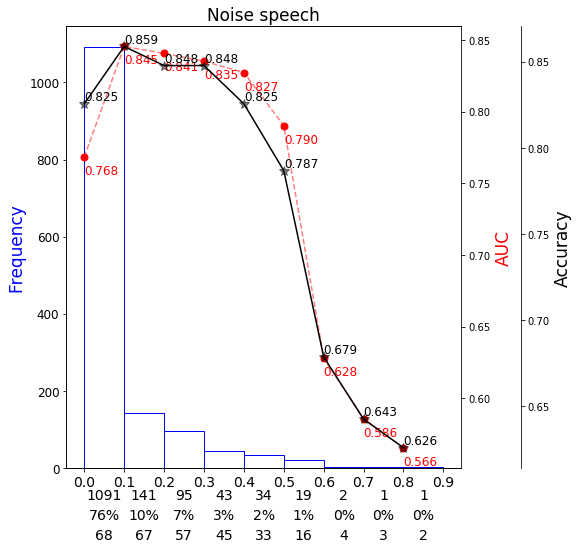

In [121]:
# roisc=[68,68,61,45,22,8,3,0,2]
# roisc=[68,64,56,46,35,13,5,2,2]
roisc=ur
from matplotlib.ticker import FormatStrFormatter
Th_2_Bins=np.asarray(Bins)
data=clf.scores_
fig, ax = plt.subplots(figsize=(8,7))
fig.subplots_adjust(right=0.75)
#counts, bins, patches = ax.hist(data,10 ,edgecolor='gray')
counts, bins, patches = ax.hist(data,bins=np.round(0.1*np.arange(0,10),2),facecolor="None",edgecolor='blue', lw=1)
# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)
# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(14) 

bin_centers = 0.5 * np.diff(bins) + bins[:-1]

#show % value
for count, x,rois in zip(counts, bin_centers,roisc):
    # Label the raw counts
    ax.annotate(int(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -20), fontsize=14,textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -40), fontsize=14,textcoords='offset points', va='top', ha='center')
    # ROIs
    ax.annotate(rois, xy=(x, 0), xycoords=('data', 'axes fraction'),
    xytext=(0, -60),fontsize=14, textcoords='offset points', va='top', ha='center')
    
    # Give ourselves some more room at the bottom of the plot

ax2 = ax.twinx()
ax2.plot(Th_2_Bins,AUC_Th2, color='red',ls='dashed',alpha=0.5)#,THbin,CCC_Per)
ax2.set_frame_on(False)
ax2.set_ylabel('AUC', color='red',fontsize=17)
ax2.patch.set_visible(False)
for i,j in zip(Th_2_Bins,AUC_Th2):
    #ax2.annotate(("%.2f" % j),xy=(i+0.04,j-0.01), color ='red') ##############################
    ax2.annotate(("%.3f" % j),xy=(i,j-0.012), color ='red',fontsize=12) ##############################
    ax2.plot(i,j, marker='o', markersize=7, color="red")


    
ax3 = ax.twinx()
ax3.plot(Th_2_Bins,ACC_Th2, color='black')#,THbin,CCC_Per)
ax3.set_frame_on(False)
ax3.set_ylabel('Accuracy', color='black',fontsize=17)



for i,j in zip(Th_2_Bins,ACC_Th2):
     #ax3.annotate(("%0.2f" % j),xy=(i-0.05,j), color='black')
    #ax3.annotate(("%0.2f" % j),xy=(i-0.1,j), color='black')##################################
    ax3.annotate(("%0.3f" % j),xy=(i,j+0.002), color='black',fontsize=12)##################################
    ax3.plot(i,j, marker='*', markersize=10, color="black",alpha=0.5)
    #ax3.annotate(("%0.2f,%0.2f" % (i,j)),xy=(i-0.05,j), color='green')
    #ax3.annotate(("%0.3f" %j),xy=(i,j), color='green')
    
    
# Move the last y-axis spine over to the right by 20% of the width of the axes
ax3.spines['right'].set_position(('axes', 1.15))
ax3.spines['right'].set_visible(True)

# To make the border of the right-most axis visible, we need to turn the frame
# on. This hides the other plots, however, so we need to turn its fill off.
ax3.set_frame_on(True)
ax3.patch.set_visible(False)

#ax.plot(bins,np.linspace(0,1,11))
plt.subplots_adjust(bottom=.15)
plt.grid(False,which='both')
ax.set_ylabel('Frequency',fontsize=17)
ax.yaxis.label.set_color('Blue')
plt.title("Noise speech", fontsize=17)
plt.tight_layout()
# #Save the image
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(12)
filename='StabilitySelection_clear'
save_format='png'
#print filename+'.'+save_format
#pp='home/ralfahad/Pictures'
#plt.savefig(filename+'.'+save_format,dpi=100)
# plt.savefig(filename+'.'+save_format,dpi=300, bbox_inches='tight')
plt.show()

